# Find best parameters

choose x1 that minimises 
cycle through the other xs, for each x_i find the parameters which minimise, overall take the one which minimises. remove from list and repeat

In [7]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [117]:
from zero_point import zpt

In [ ]:
zpt.zpt_wrapper

In [120]:
import pandas as pd
test_data=pd.concat([pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_test')[['parallax','ks_m','phot_g_mean_mag','j_m','h_m']],pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')['parallax_error']],axis=1)
test_data=test_data[test_data['parallax']>0]
test_data['err/p']=test_data['parallax_error']/test_data['parallax']
test_data=test_data[test_data['err/p']<0.2]
p=test_data['parallax'].mean()+0.021
p_std=test_data['parallax'].std()
p_err=test_data['parallax_error'].mean()

mu_err=(5/np.log(10))*test_data['err/p']

(array([2.04237e+05, 6.93000e+02, 1.32000e+02, 6.60000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.30000e+01, 3.30000e+01]),
 array([0.00300114, 0.0041463 , 0.00529146, 0.00643663, 0.00758179,
        0.00872695, 0.00987212, 0.01101728, 0.01216245, 0.01330761,
        0.01445277]),
 <BarContainer object of 10 artists>)

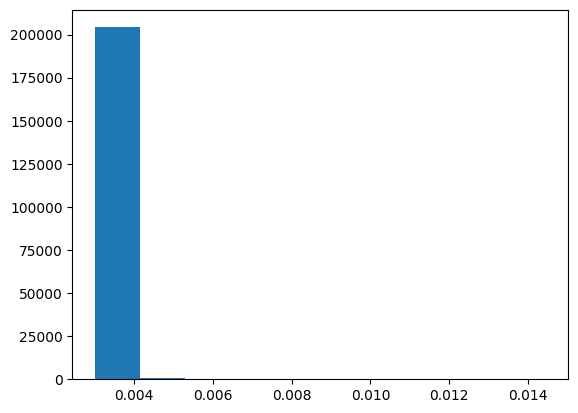

In [134]:
plt.hist(pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')['g_error'])

(array([16., 17., 10.,  7.,  5.,  2.,  1.,  3.,  1.,  1.]),
 array([0.00441343, 0.04226462, 0.08011581, 0.11796699, 0.15581818,
        0.19366937, 0.23152056, 0.26937175, 0.30722293, 0.34507412,
        0.38292531]),
 <BarContainer object of 10 artists>)

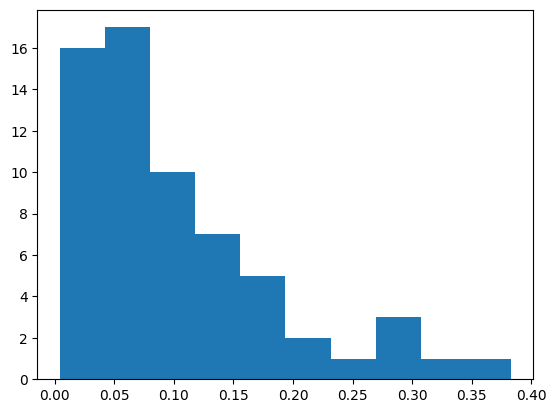

In [129]:
plt.hist(mu_err[::500])

In [137]:
(0.95-0.7)/(2*g.std())

tensor(0.7071)

In [164]:
print(extinction_vector.shape)

torch.Size([6])


In [171]:
import torch

# Given data
g = torch.tensor([0.7, 0.95])
bp = torch.tensor([0.97, 1.28])
rp = torch.tensor([0.55, 0.69])
j = torch.tensor([0.71, 0.73])/3.1
h = torch.tensor([0.45, 0.47])/3.1
ks = torch.tensor([0.34, 0.36])/3.1

extinction_vector = torch.stack([g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])[None,:]
extinction_vector_error = torch.stack([g.std(), bp.std(), rp.std(), j.std(), h.std(), ks.std()])[None,:]
error = torch.tensor([0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693, 0.05396977])[None,:]

mu_error = 100
lower_triangular_mask = torch.tril(torch.ones(6, 6))
mu_error_values=mu_err[::500].values
def func_to_maximize(W):
    total_loss=0.0
    W=W*lower_triangular_mask
    W = 1.00001*torch.tanh(W)
    for i in range(0,2):
        for mu_error in mu_error_values:
            loss = torch.einsum('ij,bj->bi', W, extinction_vector)

            loss=(1/((torch.tensor([1+i,1+i,1+i,1,1,1])*extinction_vector_error)**2 + (1.4*error)**2+(W.sum(-1)*mu_error)**2))*loss**2
            total_loss+=-loss.sum()
    return total_loss


# Initialize the variables
W = torch.randn(6, 6, requires_grad=True)



# Use gradient ascent to maximize the function
optimizer = torch.optim.Adam([W], lr=0.01)
losses=[]
# Number of optimization steps

num_steps = 1000

for step in range(num_steps):
    optimizer.zero_grad()
    loss = func_to_maximize(W)
    loss.backward()
    optimizer.step()

# Print the optimized W

mat=W.detach().numpy()
#mat=np.tanh(mat)
mat=1.00001*np.tanh(lower_triangular_mask.numpy()*(mat))

func_to_maximize(W)


print(mat)
print("Optimized W:")
print(np.linalg.det(mat))
print(mat.astype.sum(-1))


[[ 0.99990314  0.          0.         -0.         -0.          0.        ]
 [ 0.9996464   0.99291354  0.          0.          0.         -0.        ]
 [-0.9970804  -0.995625   -0.9882968  -0.          0.         -0.        ]
 [ 0.99622095  0.9890526   0.99426174 -0.9970798  -0.         -0.        ]
 [-0.99933535 -0.9956708  -0.07566153  0.99717516  0.9986168  -0.        ]
 [ 0.99883384  0.99951226  0.99490476 -0.9788156  -0.99273777 -0.9851331 ]]
Optimized W:
-0.9624551


AttributeError: 'builtin_function_or_method' object has no attribute 'sum'

In [167]:
func_to_maximize(W)

tensor(-1950030.2500, grad_fn=<AddBackward0>)

In [168]:
total_loss=0.0
for i in range(0,2):
    for mu_error in mu_error_values:
        loss =np.matmul(mat.round(), extinction_vector.numpy())

        loss=(1/((np.array([1+i,1+i,1+i,1,1,1])*extinction_vector_error.numpy())**2 + (1.4*error.numpy())**2+(mat.round().sum(-1)*mu_error)**2))*loss**2
        total_loss+=-loss.sum()
total_loss

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 6)

In [170]:
mat.round().sum(-1)

array([ 1., -2., -3., -2.,  0.,  0.], dtype=float32)

array([[ 1.],
       [-1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.]], dtype=float32)

In [163]:
(mat.round()/np.sign(mat.round()[:,0])[:,None])

array([[ 1.,  0.,  0.,  0., -0.,  0.],
       [ 1.,  1., -0., -0.,  0.,  0.],
       [ 1.,  1.,  1., -0.,  0., -0.],
       [ 1.,  1.,  1., -1.,  0.,  0.],
       [ 1.,  1.,  0., -1., -1.,  0.],
       [ 1.,  1.,  1., -1., -1., -1.]], dtype=float32)

# Check which individual band is the bast

In [4]:
extinction_vector_error**2 + error**2

tensor([0.0313, 0.0482, 0.0098, 0.0013, 0.0014, 0.0029])

In [5]:
mu_error = np.arange(0.01,1,0.05)
arrs=[]
for mu_error in np.arange(0.01,1,0.05):
    def index_check(i,j):
        z=torch.zeros(6,6)
        z[i,j]=1
        W=z

        loss = torch.matmul(W, extinction_vector)
        loss=(1/(extinction_vector_error**2 + error**2+(W.sum(-1)*mu_error)**2))*loss**2
        return loss.sum()
    arrs.append(np.array([index_check(i,i) for i in range(6)]))

Text(0.5, 0, 'mu_error')

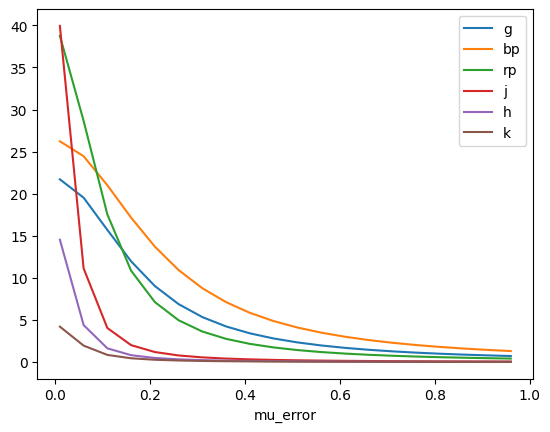

In [8]:
names=['g','bp','rp','j','h','k']
for i in range(len(names)):
    plt.plot(np.arange(0.01,1,0.05),np.stack(arrs,axis=0)[:,i],label=names[i])
plt.legend()
plt.xlabel('mu_error')

In [11]:

def index_check_second_row(i,k,coeffs,mu_error):
    a,b=coeffs
    z=torch.zeros(6,6)
    z[i,i]=1
    z[i+1,i]=a 
    z[i+1,k]=b
    W=z


    loss = torch.matmul(W, extinction_vector)
    loss=(1/(extinction_vector_error**2 + error**2+(W.sum(-1)*mu_error)**2))*loss**2
    


    return (loss).sum()  # Negating because we want to maximize

In [14]:
def marginalize_over_mu_error(i, k, coeffs, mu_error_values=np.arange(0.01,1,0.05)):
    total_loss = 0
    for mu_error in mu_error_values:
        loss = index_check_second_row(i,k,coeffs,mu_error)
        total_loss += loss
    return total_loss / len(mu_error_values)

KeyboardInterrupt: 

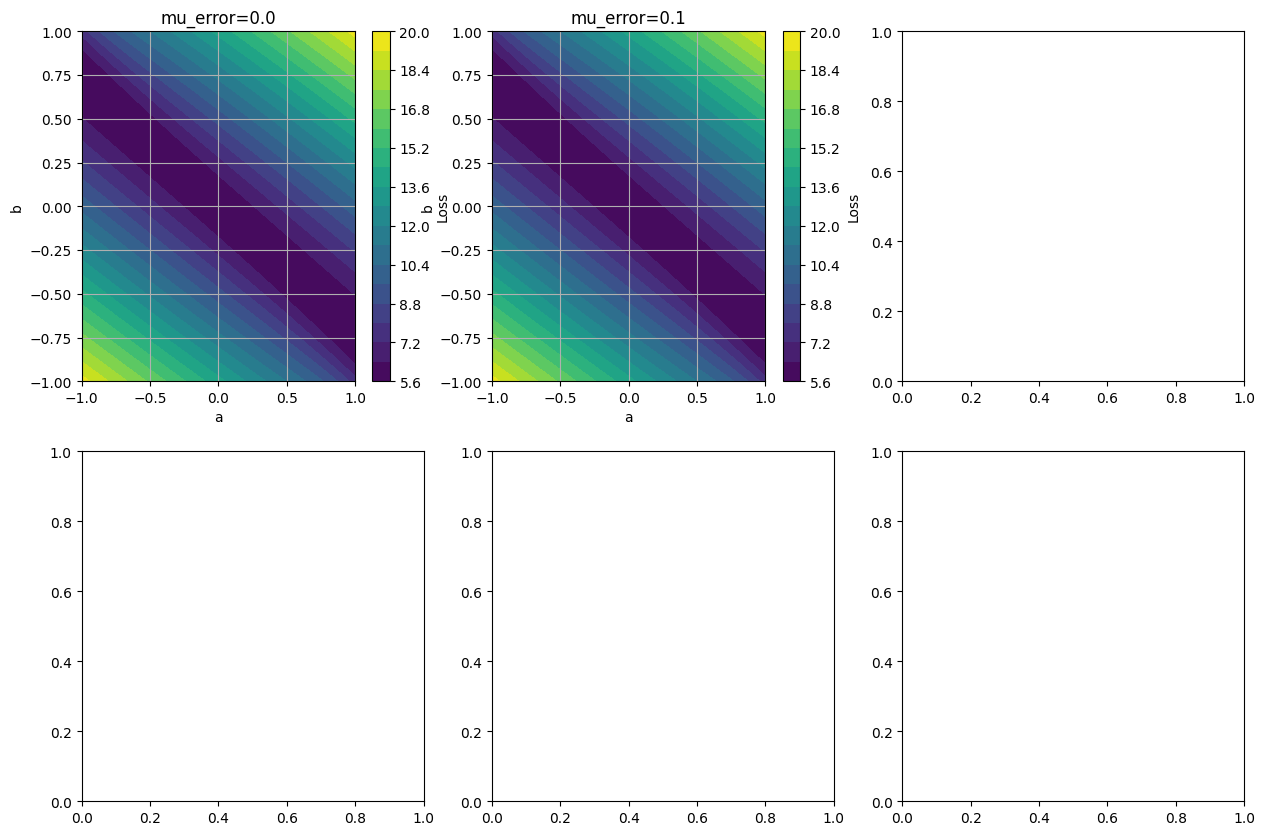

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
a_values = np.linspace(-1, 1, 100)
b_values = np.linspace(-1, 1, 100)
A, B = np.meshgrid(a_values, b_values)


# Plotting for different values of mu_error
mu_errors = [0.00, 0.1, 0.2, 0.3, 0.4, 0.5]
num_subplots = len(mu_errors)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
cmap = 'viridis'

for i, mu_error in enumerate(mu_errors):
    loss_values = np.zeros_like(A)
    for j in range(len(a_values)):
        for k in range(len(b_values)):
            coeffs = (A[j, k], B[j, k])
            loss_values[j, k] = index_check_second_row(0,1,coeffs, mu_error)

    ax = axes[i // 3, i % 3]
    im = ax.contourf(A, B, loss_values, levels=20, cmap=cmap)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title(f'mu_error={mu_error}')
    ax.grid(True)

    # Add individual colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Loss')

plt.tight_layout()
plt.show()


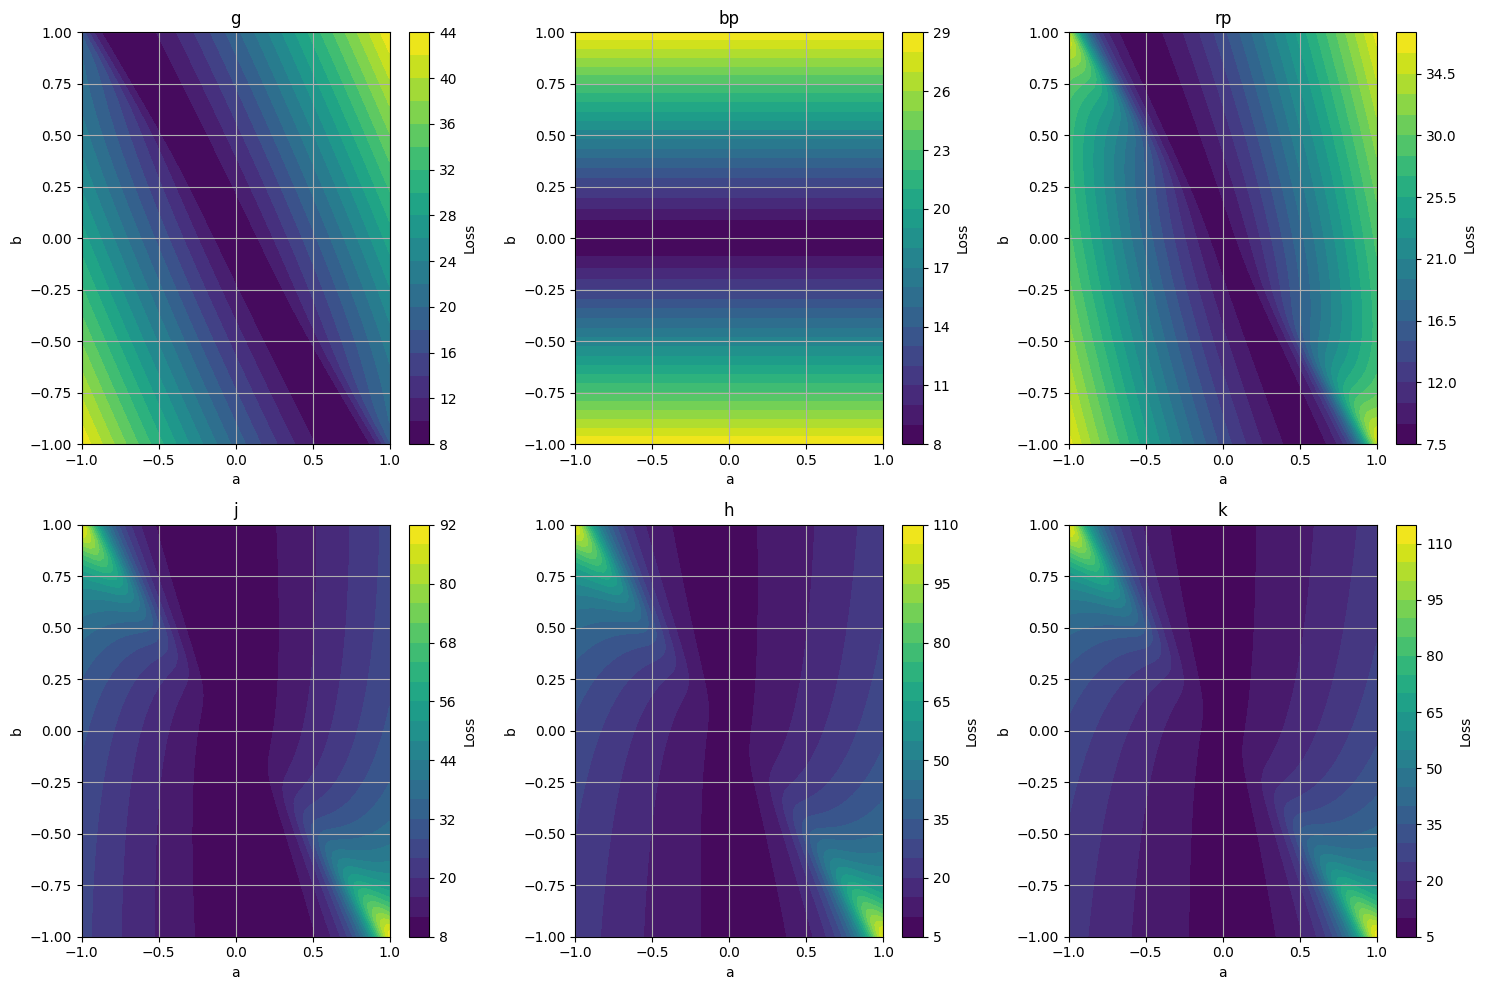

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
a_values = np.linspace(-1, 1, 100)
b_values = np.linspace(-1, 1, 100)
A, B = np.meshgrid(a_values, b_values)


# Plotting for different values of mu_error
mu_errors = [0.00, 0.1, 0.2, 0.3, 0.4, 0.5]
num_subplots = len(mu_errors)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
cmap = 'viridis'

for i in range(6):
    loss_values = np.zeros_like(A)
    for j in range(len(a_values)):
        for k in range(len(b_values)):
            coeffs = (A[j, k], B[j, k])
            loss_values[j, k] = marginalize_over_mu_error(1,i,coeffs)

    ax = axes[i // 3, i % 3]
    im = ax.contourf(A, B, loss_values, levels=20, cmap=cmap)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title(names[i])
    ax.grid(True)

    # Add individual colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Loss')

plt.tight_layout()
plt.show()


In [600]:
mat.sum(-1)

array([-0.1507199 ,  0.20351195, -0.46637744, -3.4912977 , -2.5964608 ,
        0.5014684 ], dtype=float32)

# Error on mu

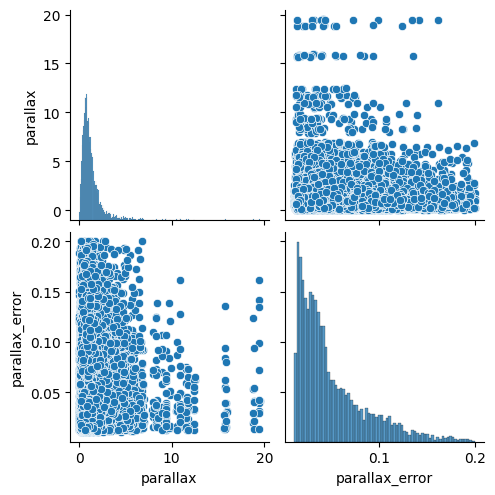

In [104]:
import seaborn as sn
test_data=test_data[test_data['parallax_error']<0.2]
sn.pairplot(test_data[['parallax','parallax_error']])


In [105]:
import pandas as pd
test_data=pd.concat([pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_test')[['parallax','ks_m','phot_g_mean_mag','j_m','h_m']],pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')['parallax_error']],axis=1)
test_data=test_data[test_data['parallax']>0]
test_data['err/p']=test_data['parallax_error']/test_data['parallax']
test_data=test_data[test_data['err/p']<0.2]
p=test_data['parallax'].mean()
p_std=test_data['parallax'].std()
p_err=test_data['parallax_error'].mean()

mu_err=(5/np.log(10))*test_data['err/p']

<Axes: xlabel='err/p', ylabel='Count'>

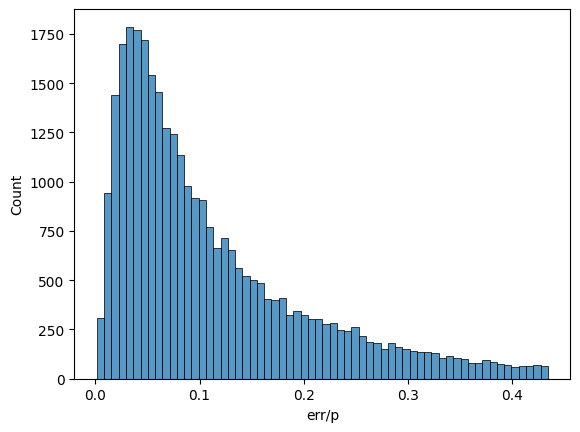

In [108]:
sn.histplot(mu_err)

In [106]:
import numpy as np

In [537]:
g = np.array([0.7, 0.95])
bp = np.array([0.97,1.28])
rp = np.array([0.55, 0.69])
j = np.array([0.71, 0.73])/3.1
h = np.array([0.45,0.47])/3.1
ks = np.array([0.34, 0.36])/3.1

extinction_vector=np.array([g.mean(),bp.mean(),rp.mean(),j.mean(),h.mean(),ks.mean()])
extinction_vector_error=np.array([g.std(),bp.std(),rp.std(),j.std(),h.std(),ks.std()])

error=np.array([0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693,
       0.05396977])

mu_error=0.4

In [349]:
from scipy.optimize import minimize


In [378]:
S=[0,1,2,3,4,5]

initial_idx=5
extinction_vector[initial_idx]/np.sqrt(extinction_vector_error[initial_idx]**2+error[initial_idx]**2+mu_error**2)

row=1
def loss_function(coeffs,idxs):
    loss=0.0
    for i,idx in enumerate(idxs):
        loss+=coeffs[i]*extinction_vector[idx]/np.sqrt(coeffs[i]**2*(extinction_vector_error[idx]**2+error[idx]**2)+(np.array(coeffs).sum()*mu_error)**2)

    if(np.abs(loss)>=0.0):
        return -1*(loss**2)
    else:
        return 100


# Initial guess for 'a' and 'b'
initial_guess = [0.1] * (row + 1)  # You can choose any initial values

# Additional constraint: sum of 'a' values should be zero
cons = ({'type': 'eq', 'fun': lambda x: sum(x)})


# Optimization
result = minimize(loss_function, initial_guess , args=([0,5]))


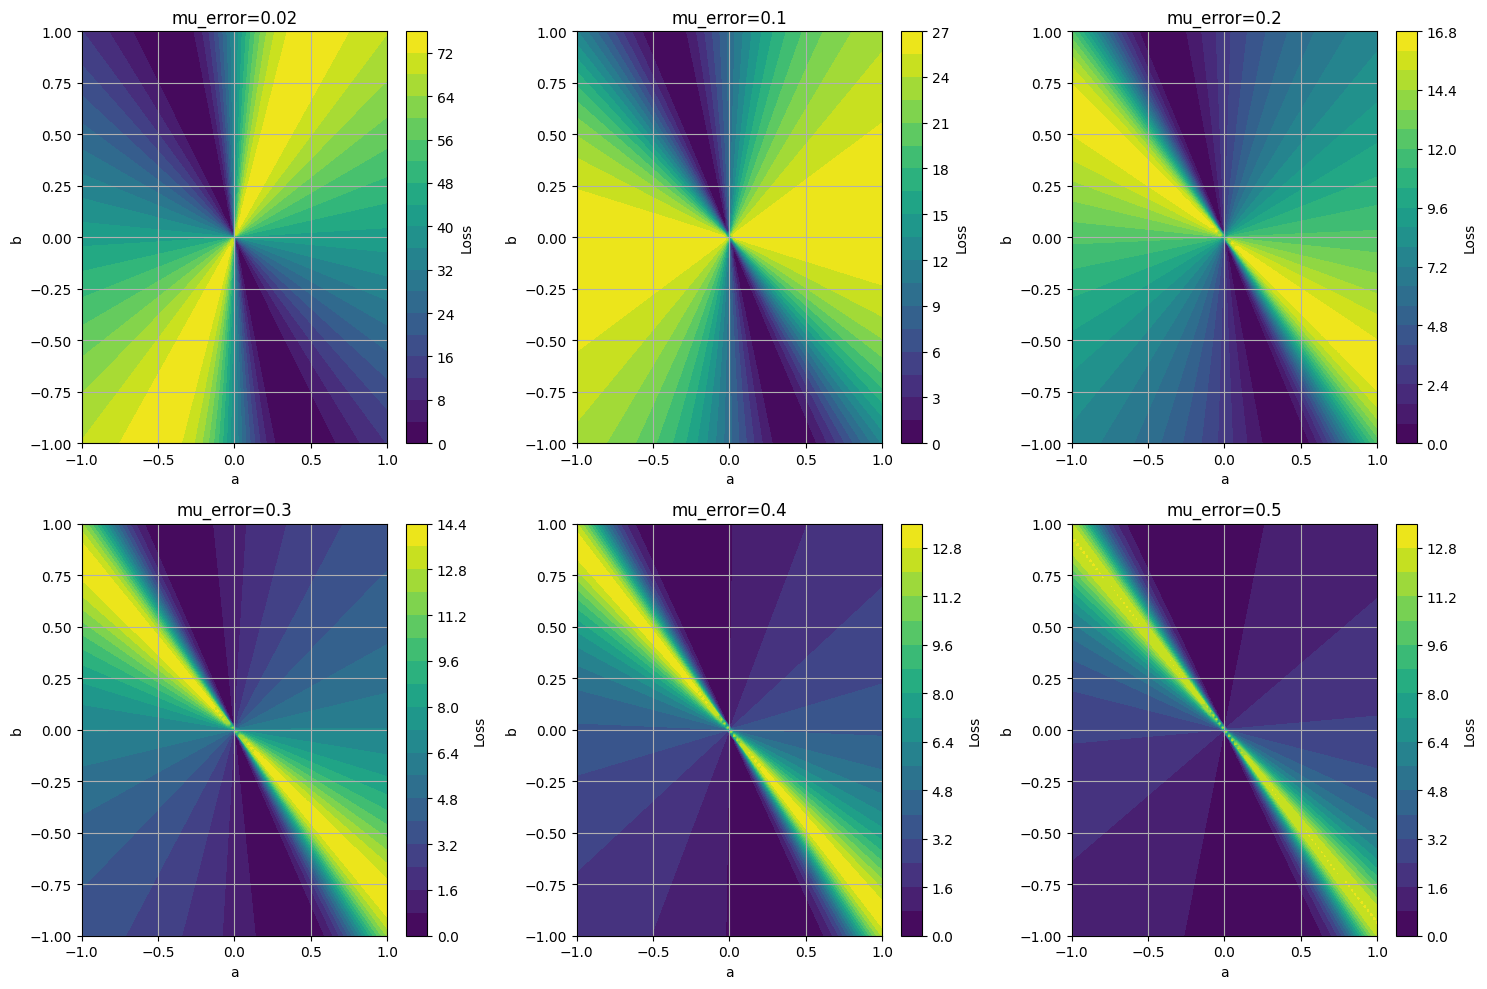

In [383]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
a_values = np.linspace(-1, 1, 100)
b_values = np.linspace(-1, 1, 100)
A, B = np.meshgrid(a_values, b_values)

# Function to calculate loss
def loss_function(coeffs, idxs, mu_error):
    loss = 0.0
    err=0.0
    for i, idx in enumerate(idxs):
        loss += coeffs[i] * extinction_vector[idx]
        err+=coeffs[i]**2 * (extinction_vector_error[idx]**2 + error[idx]**2)
    err+=(np.array(coeffs).sum()*mu_error)**2

    if np.abs(loss) >= 0.0:
        return loss**2/err
    else:
        return 100

# Plotting for different values of mu_error
mu_errors = [0.02, 0.1, 0.2, 0.3, 0.4, 0.5]
num_subplots = len(mu_errors)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
cmap = 'viridis'

for i, mu_error in enumerate(mu_errors):
    loss_values = np.zeros_like(A)
    for j in range(len(a_values)):
        for k in range(len(b_values)):
            coeffs = (A[j, k], B[j, k])
            loss_values[j, k] = loss_function(coeffs, [0, 5], mu_error)

    ax = axes[i // 3, i % 3]
    im = ax.contourf(A, B, loss_values, levels=20, cmap=cmap)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title(f'mu_error={mu_error}')
    ax.grid(True)

    # Add individual colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Loss')

plt.tight_layout()
plt.show()


In [272]:
result.x

array([ 0.82221474, -0.61131012])

In [99]:

import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpyro
from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS

# Generate some synthetic data
error=jnp.array([0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693,
       0.05396977])

mu_error=0.086
# Define the Bayesian model
def model(err,mu_err):
   # Priors for the elements of the matrix
   g = numpyro.sample("g", dist.Uniform(0.7, 0.95))
   bp = numpyro.sample("bp", dist.Uniform(0.97,1.28))
   rp = numpyro.sample("rp", dist.Uniform(0.55, 0.69))
   j = numpyro.sample("j", dist.Uniform(0.71, 0.73))
   h = numpyro.sample("h", dist.Uniform(0.45,0.47))
   ks = numpyro.sample("ks", dist.Uniform(0.34, 0.36))

   extinction_vector=jnp.array([g,bp,rp,j,h,ks])

   length_matrix = int(6*6)

   with numpyro.plate("plate_i", length_matrix):
      coeff = numpyro.sample("coeff", dist.Uniform(-10,10.0))

   mask = jnp.tril(jnp.ones((6, 6)))
   coeff=mask*coeff.reshape(6,6)
   diag_indices = jnp.diag_indices(6)
   coeff = coeff.at[diag_indices].set(jnp.exp(jnp.diag(coeff)))
   row_sum=coeff[1:].sum(-1)
   det=jnp.linalg.det(coeff)


   magnitude=coeff@(extinction_vector/err)
   absolute_value=jnp.sqrt((magnitude**2).sum())

   numpyro.sample("obs", dist.Normal((row_sum+1/(absolute_value)), 1.0), obs=0.0)





In [100]:
nuts_kernel = NUTS(model)

mcmc = MCMC(nuts_kernel, num_samples=20000, num_warmup=20000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key,error,mu_error)

posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 40000/40000 [00:23<00:00, 1718.17it/s, 255 steps of size 1.65e-02. acc. prob=0.93]


In [101]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        bp      1.12      0.09      1.12      0.98      1.26  34409.33      1.00
  coeff[0]     -0.02      5.83     -0.07     -8.93      9.12  15005.24      1.00
  coeff[1]      0.04      5.80      0.14     -8.21      9.83  36197.88      1.00
  coeff[2]      0.09      5.86      0.14     -8.03      9.95  22653.97      1.00
  coeff[3]     -0.08      5.83     -0.11    -10.00      8.03  13002.66      1.00
  coeff[4]      0.06      5.83      0.08     -8.77      9.23  13687.43      1.00
  coeff[5]     -0.10      5.79     -0.19     -8.61      9.30  20697.63      1.00
  coeff[6]     -0.75      1.97     -0.36     -3.24      2.01   3085.30      1.00
  coeff[7]     -3.93      3.54     -3.95     -9.93      1.01   4778.30      1.00
  coeff[8]     -0.02      5.74     -0.03     -8.87      8.99  33606.51      1.00
  coeff[9]      0.07      5.80      0.13     -8.09      9.94  32197.89      1.00
 coeff[10]      0.02      5

In [102]:

mask = jnp.tril(jnp.ones((6, 6)))
coeff=mask*mcmc.get_samples()['coeff'].mean(0).reshape(6,6)
diag_indices = jnp.diag_indices(6)
coeff = coeff.at[diag_indices].set(jnp.exp(jnp.diag(coeff)))

jnp.linalg.det(coeff)

Array(5.3425255e-09, dtype=float32)

In [103]:
coeff

Array([[ 0.97554755,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        ],
       [-0.74896026,  0.01964213, -0.        ,  0.        ,  0.        ,
        -0.        ],
       [-0.38486752, -0.4398075 ,  0.01929944, -0.        , -0.        ,
         0.        ],
       [-0.34118697, -0.40074655, -0.33629087,  0.0229108 ,  0.        ,
        -0.        ],
       [-0.27306283, -0.24008287, -0.36045942, -0.2338927 ,  0.02436601,
        -0.        ],
       [-0.23204385, -0.2715951 , -0.31730285, -0.28957257, -0.24038456,
         0.02587861]], dtype=float32)

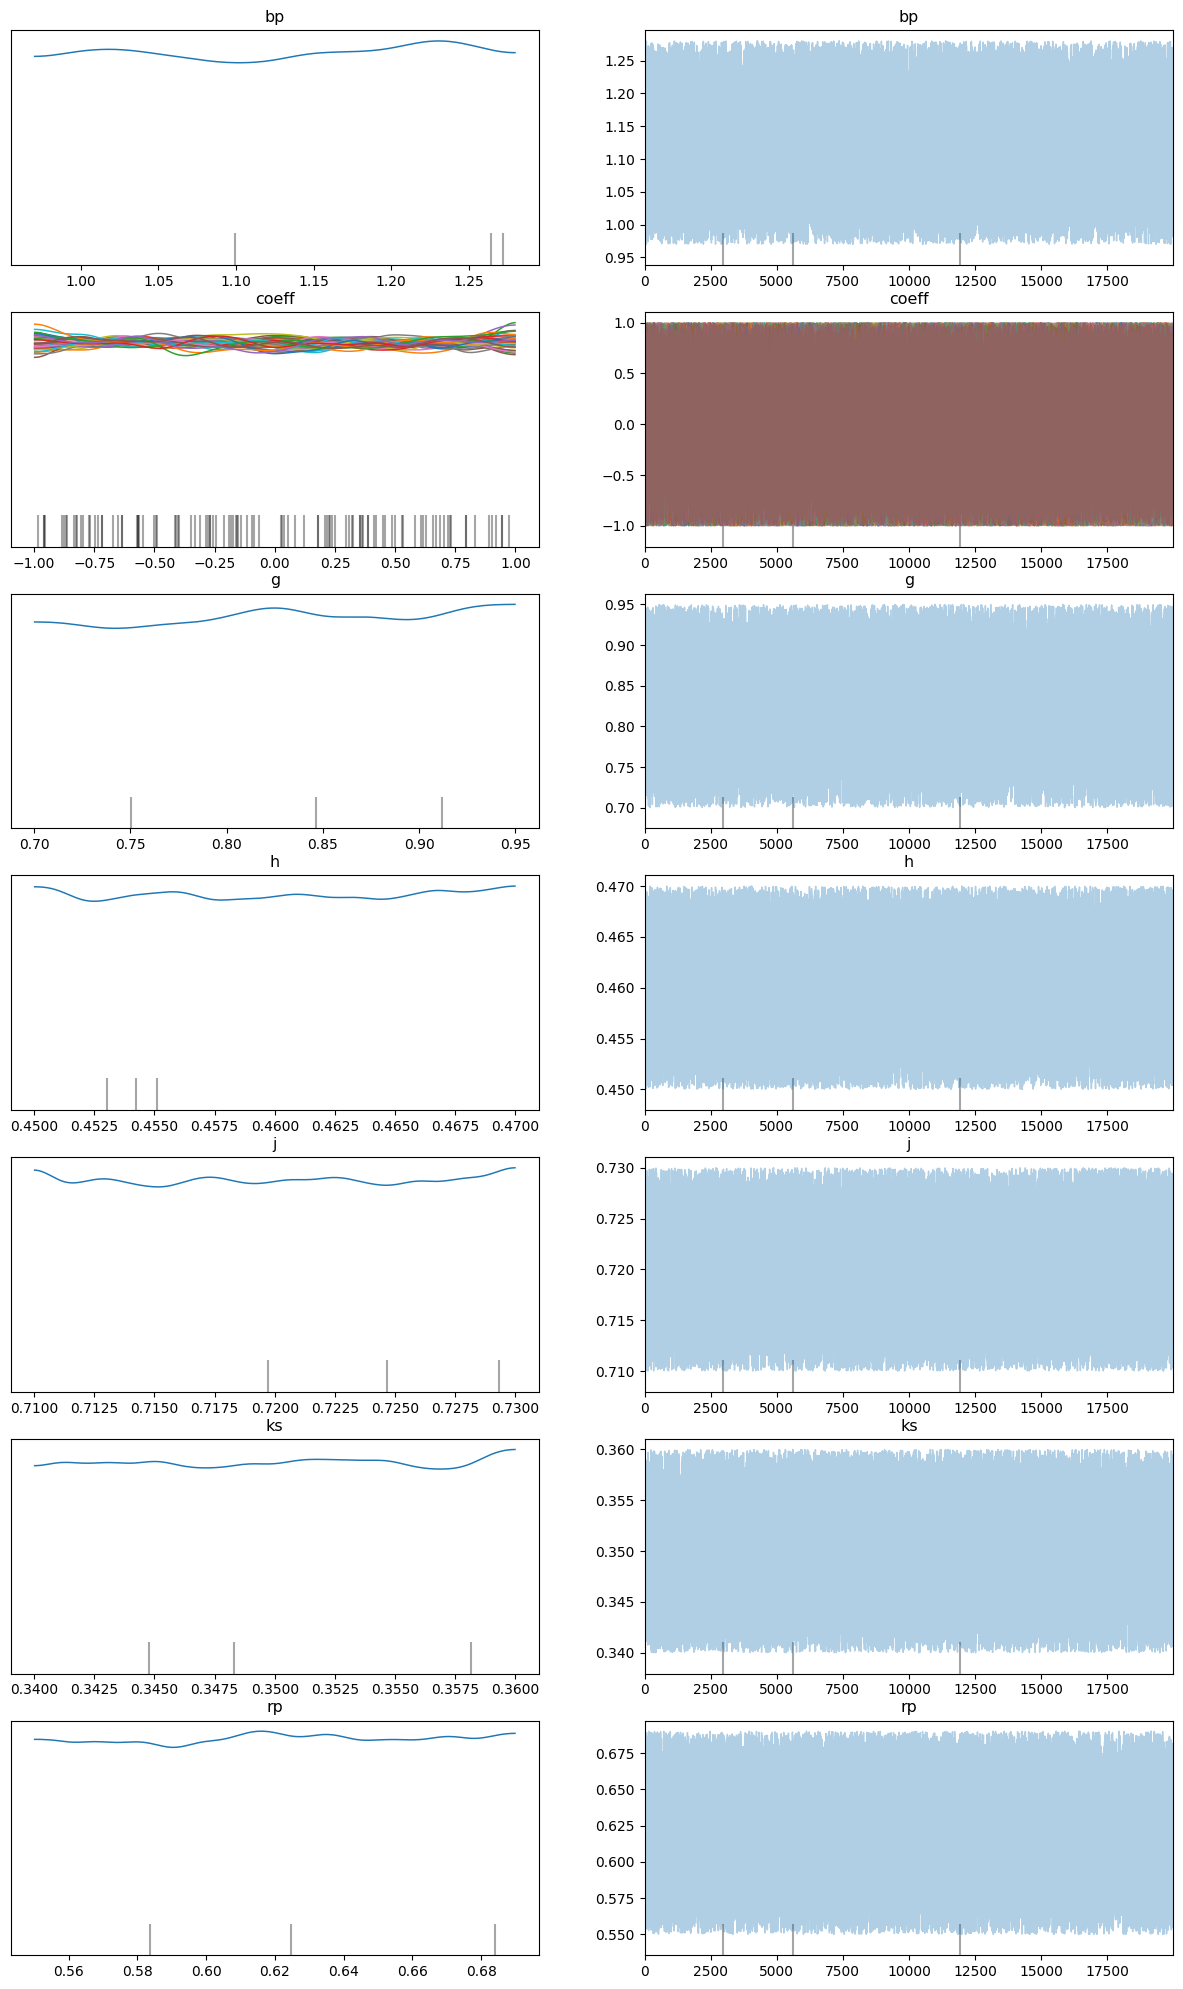

In [66]:
import arviz as az

data = az.from_numpyro(mcmc)
az.plot_trace(data, compact=True, figsize=(15, 25));